In [2]:
# Artificial Neural Network

# Installing Theano
# pip install --upgrade --no-deps git+git://github.com/Theano/Theano.git

# Installing Tensorflow
# pip install tensorflow

# Installing Keras
# pip install --upgrade keras

# Part 1 - Data Preprocessing

In [3]:
!pip install -r requirements.txt

In [256]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mlxtend.plotting import plot_confusion_matrix


In [257]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

In [258]:
df1 = dataset.iloc[:, 3:14]
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [259]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:]

/home/andrew/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/andrew/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [261]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [262]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [263]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [318]:
def plotConfusion(array):
#   Method to plot confusion matrix
    df_cm = pd.DataFrame(
        array
    )
    fig = plt.figure(figsize=(5, 4))
    try:
        heatmap = sn.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [320]:
def learn(layers,epochs=30):
    # layers -> array of dictionaries
    # epochs -> int     
    #     EX:
    #   learn([
    #         {'units': 10, 'activation': 'relu'},
    #         {'units': 1, 'activation': 'sigmoid'}
    #     ], 50)
    
    
    # Initialising the ANN
    classifier = Sequential()

    for layer in layers:
        # Adding the input layer and the first hidden layer
        classifier.add(Dense(units = layer['units'], activation = layer['activation']))

    # Compiling the ANN
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    # Fitting the ANN to the Training set
    classifier.fit(X_train, y_train, batch_size = 10, epochs = epochs)

    # Predicting the Test set results
    y_pred = classifier.predict(X_test)
    y_pred = (y_pred > 0.5)

    # Making the Confusion Matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred)
    plotConfusion(cm)

Epoch 1/30
8000/8000 [==============================] - 4s 537us/step - loss: 0.8432 - acc: 0.5835
Epoch 2/30
8000/8000 [==============================] - 2s 220us/step - loss: 0.5007 - acc: 0.7976
Epoch 3/30
8000/8000 [==============================] - 2s 212us/step - loss: 0.4582 - acc: 0.8065
Epoch 4/30
8000/8000 [==============================] - 2s 210us/step - loss: 0.4489 - acc: 0.8127
Epoch 5/30
8000/8000 [==============================] - 2s 219us/step - loss: 0.4442 - acc: 0.8172
Epoch 6/30
8000/8000 [==============================] - 2s 217us/step - loss: 0.4273 - acc: 0.8154
Epoch 7/30
8000/8000 [==============================] - 2s 210us/step - loss: 0.4181 - acc: 0.8191
Epoch 8/30
8000/8000 [==============================] - 2s 216us/step - loss: 0.4180 - acc: 0.8241
Epoch 9/30
8000/8000 [==============================] - 2s 211us/step - loss: 0.4146 - acc: 0.8317
Epoch 10/30
8000/8000 [==============================] - 2s 214us/step - loss: 0.4202 - acc: 0.8297
Epoch 11/

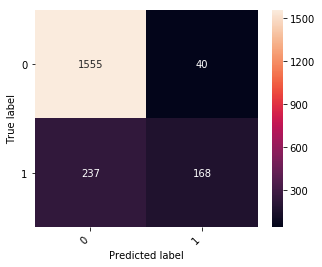

In [326]:
learn([
    {'units': 10, 'activation': 'relu'},
    {'units': 10, 'activation': 'hard_sigmoid'},
    {'units': 1, 'activation': 'relu'}
])

Epoch 1/30
8000/8000 [==============================] - 5s 580us/step - loss: 0.4465 - acc: 0.7982
Epoch 2/30
8000/8000 [==============================] - 2s 256us/step - loss: 0.4205 - acc: 0.8090
Epoch 3/30
8000/8000 [==============================] - 3s 328us/step - loss: 0.4073 - acc: 0.8141
Epoch 4/30
8000/8000 [==============================] - 2s 252us/step - loss: 0.4001 - acc: 0.8185
Epoch 5/30
8000/8000 [==============================] - 2s 242us/step - loss: 0.3956 - acc: 0.8185
Epoch 6/30
8000/8000 [==============================] - 2s 247us/step - loss: 0.3950 - acc: 0.8195
Epoch 7/30
8000/8000 [==============================] - 2s 240us/step - loss: 0.3910 - acc: 0.8195
Epoch 8/30
8000/8000 [==============================] - 2s 239us/step - loss: 0.3915 - acc: 0.8197
Epoch 9/30
8000/8000 [==============================] - 2s 247us/step - loss: 0.3909 - acc: 0.8207
Epoch 10/30
8000/8000 [==============================] - 2s 245us/step - loss: 0.3884 - acc: 0.8180
Epoch 11/

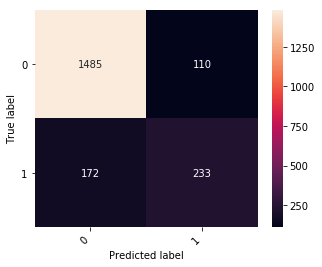

In [330]:
learn([
    {'units': 480, 'activation': 'exponential'},
    {'units': 6, 'activation': 'tanh'},
    {'units': 1, 'activation': 'sigmoid'}
])

Epoch 1/30
8000/8000 [==============================] - 5s 679us/step - loss: 0.4814 - acc: 0.8114
Epoch 2/30
8000/8000 [==============================] - 2s 305us/step - loss: 0.4734 - acc: 0.8076
Epoch 3/30
8000/8000 [==============================] - 2s 229us/step - loss: 0.4357 - acc: 0.8281
Epoch 4/30
8000/8000 [==============================] - 2s 217us/step - loss: 0.4229 - acc: 0.8381
Epoch 5/30
8000/8000 [==============================] - 2s 218us/step - loss: 0.4591 - acc: 0.8194
Epoch 6/30
8000/8000 [==============================] - 2s 225us/step - loss: 0.4368 - acc: 0.8407
Epoch 7/30
8000/8000 [==============================] - 2s 255us/step - loss: 0.4252 - acc: 0.8452
Epoch 8/30
8000/8000 [==============================] - 2s 269us/step - loss: 0.4238 - acc: 0.8342
Epoch 9/30
8000/8000 [==============================] - 2s 228us/step - loss: 0.4173 - acc: 0.8475
Epoch 10/30
8000/8000 [==============================] - 2s 216us/step - loss: 0.4172 - acc: 0.8437
Epoch 11/

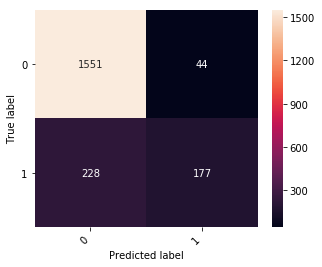

In [328]:
learn([
    {'units': 50, 'activation': 'relu'},
    {'units': 20, 'activation': 'sigmoid'},
    {'units': 1, 'activation': 'relu'}
])